In [344]:
import torch
import torch.nn
from torch.autograd import Variable

In [345]:
import pandas as pd
import numpy as np

In [346]:
import matplotlib
import matplotlib.pyplot as plt

In [347]:
df = pd.read_csv('/home/mike/iris', header=None, names=['var1', 'var2', 'var3', 'var4', 'target'])

In [348]:
x = df.as_matrix()[:, :-1]
#y = df.as_matrix()[:, -1]
y = [0]*50 +  [1]*50 + [2]*50


In [351]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 12), 
    torch.nn.ReLU(),
    torch.nn.Linear(12, 6), 
    torch.nn.ReLU(),
    torch.nn.Linear(6, 3),
    torch.nn.Softmax(1),
)

In [352]:
model

Sequential(
  (0): Linear(in_features=4, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=3, bias=True)
  (5): Softmax()
)

In [353]:
lr = 1e-4

In [355]:
X = Variable(torch.from_numpy(x.astype(np.double)).float())

In [356]:
Y = Variable(torch.from_numpy(np.array(y)).long(), requires_grad=False)

In [357]:
epoch = 5000
ls = [0]*epoch

In [358]:
LOSS = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)
#optim = torch.optim.SGD(model.parameters(), lr=lr)

In [359]:
for e in range(epoch):
    y_hat = model(X)
    optim.zero_grad()
    loss = LOSS(y_hat, Y)
    ls[e] = loss.data[0]
    loss.backward()
    optim.step()

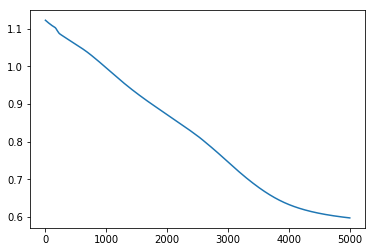

In [360]:
plt.plot(ls)

In [361]:
out = model(X)

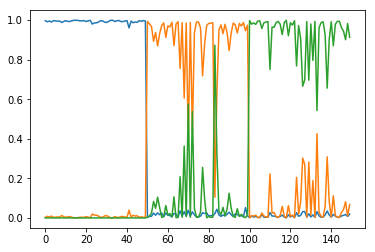

In [362]:
plt.plot(out.data.numpy())


In [363]:
_, pred = torch.max(out, 1)

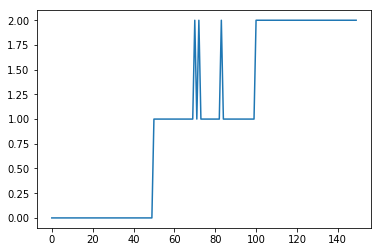

In [364]:
plt.plot(pred.data.numpy())

In [365]:
pred.data.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])